In [47]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.misc import imresize
from skimage.color import rgb2gray
%matplotlib inline
imagedir = '../../dogs/Images'

In [48]:
# remove dsstore
for d in os.listdir(imagedir):
    if d.find('.DS') != -1:
        os.remove(os.path.join(imagedir,d))
        continue
    for f in os.listdir(os.path.join(imagedir, d)):
        if f.find('.DS') != -1:
            os.remove(os.path.join(imagedir,d,f))

In [49]:
def load_images(num_classes, h, w):
    
    # preinitialize the matrix
    #img_arr = np.empty((num_samples_per_breed*num_breeds,h*w))  # 20 instances of each breed, each img will be 200x200 = 40000 pixels
    img_arr = []
    label_arr = []
    
    # sample 60 breeds from the dataset
    a = np.arange(len(os.listdir(imagedir)))
    np.random.shuffle(a)
    breed_sample_idxs = a[:num_classes]
    for i, idx in enumerate(breed_sample_idxs):
        breed = os.listdir(imagedir)[idx]
        if breed[0] == '.' : 
            continue # stupid ds.store on mac
        print(i,breed)
        
        for img in os.listdir(os.path.join(imagedir, breed)):
            dog_path = os.path.join(imagedir,breed,img)            

            img = plt.imread(dog_path)
            
            # converts image to gray, resizes it to be 200x200, and then linearizes it
            img_gray_resize_flat = rgb2gray(imresize(img, (h,w,3))).flatten()
                        
            img_arr.append(img_gray_resize_flat)

            # add name to list of labels
            fname = dog_path.split('/')[-1] # 'dog_name_123497.jpg'
            dog_name = fname[:fname.rfind('_')] # 'dog_name'
            label_arr.append(breed)
            
    return img_arr, label_arr


In [50]:
%%time
num_breeds = 5
h=128
w=128
dogs, labels = load_images(num_classes=num_breeds, h=h, w=w)
print(len(dogs))

0 West_Highland_white_terrier
1 German_shepherd
2 whippet
3 Chesapeake_Bay_retriever
4 black
834
Wall time: 6.94 s


In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(dogs)

X = np.array(dogs)

enc = LabelEncoder()
y = enc.fit_transform(labels)

df

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.480196,0.491961,0.495882,0.503725,0.505943,0.505943,0.513786,0.517707,0.503711,0.491893,...,0.185426,0.186245,0.184295,0.178707,0.189356,0.185717,0.186245,0.177568,0.174785,0.171407
1,0.060871,0.072866,0.077583,0.075305,0.072500,0.071949,0.071667,0.071667,0.071667,0.075588,...,0.125936,0.129024,0.127908,0.124269,0.128191,0.143594,0.123986,0.125936,0.125936,0.107444
2,0.162734,0.226282,0.294005,0.369869,0.428931,0.466985,0.528056,0.475507,0.176181,0.250103,...,0.080083,0.067485,0.071957,0.101358,0.117877,0.073096,0.068341,0.064420,0.060498,0.050415
3,0.452126,0.467247,0.482368,0.470871,0.298164,0.236711,0.281651,0.369713,0.415961,0.464992,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.059744,0.053941,0.072938,0.095426,0.071799,0.067380,0.119126,0.169855,0.160047,0.143787,...,0.442049,0.439244,0.435322,0.446253,0.447369,0.436170,0.432249,0.428327,0.432249,0.419636
5,0.313725,0.292145,0.270283,0.315369,0.324351,0.329412,0.337255,0.337255,0.337255,0.337255,...,0.405113,0.400067,0.396429,0.396429,0.392507,0.405105,0.401734,0.400886,0.384917,0.360271
6,0.309506,0.360769,0.422666,0.369141,0.267313,0.218517,0.180349,0.174158,0.221064,0.215359,...,0.492361,0.508047,0.543341,0.555106,0.523733,0.513650,0.517572,0.501885,0.513650,0.509729
7,0.440673,0.444595,0.436751,0.433663,0.437853,0.429727,0.421884,0.417962,0.419911,0.408980,...,0.381865,0.345440,0.323042,0.325289,0.333415,0.340142,0.257215,0.237355,0.277992,0.278535
8,0.429169,0.571739,0.622318,0.647507,0.634336,0.593736,0.337955,0.109505,0.083737,0.214621,...,0.623620,0.591535,0.619811,0.649849,0.620173,0.536327,0.537941,0.581278,0.561633,0.525505
9,0.284800,0.362681,0.437756,0.490136,0.520683,0.527960,0.512825,0.522052,0.525140,0.506916,...,0.137799,0.143976,0.135865,0.140077,0.161642,0.127188,0.124383,0.124383,0.121577,0.120468


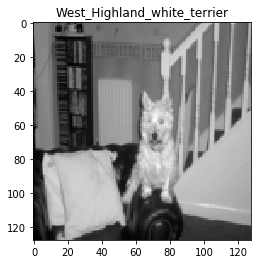

In [52]:
ex = dogs[0].reshape((h,w))
plt.imshow(ex, cmap='gray')
plt.title(labels[0])
plt.show()

In [53]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(0) # using this to help make results reproducible

# Split it into train / test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split X_train again to create validation data
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

X_train.shape

(667, 16384)

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model

keras.__version__

'2.0.9'

In [55]:
NUM_CLASSES = 5
print(X_train.shape)
print(X_test.shape)

(667, 16384)
(167, 16384)


In [56]:
%%time

y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Dense(input_dim=X_train.shape[1], units=30, activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=10, 
        shuffle=True, verbose=1)

Epoch 1/10
667/667 [==============================] - 1s 1ms/step - loss: 0.3108 - acc: 0.1964
Epoch 2/10
667/667 [==============================] - 0s 523us/step - loss: 0.3196 - acc: 0.2009
Epoch 3/10
667/667 [==============================] - 0s 519us/step - loss: 0.3196 - acc: 0.2009
Epoch 4/10
667/667 [==============================] - 0s 509us/step - loss: 0.3149 - acc: 0.2069
Epoch 5/10
667/667 [==============================] - 0s 517us/step - loss: 0.3196 - acc: 0.2009
Epoch 6/10
667/667 [==============================] - 0s 520us/step - loss: 0.3196 - acc: 0.2009
Epoch 7/10
667/667 [==============================] - 0s 524us/step - loss: 0.3196 - acc: 0.2009
Epoch 8/10
667/667 [==============================] - 0s 526us/step - loss: 0.3112 - acc: 0.2114
Epoch 9/10
667/667 [==============================] - 0s 516us/step - loss: 0.3130 - acc: 0.2174
Epoch 10/10
667/667 [==============================] - 0s 514us/step - loss: 0.3130 - acc: 0.2174
Wall time: 4.63 s


In [57]:
%%time


cnn_layers = [16, 16]

# make a CNN with conv layer and max pooling
cnn = Sequential()
cnn.add(Reshape((1,h,w), input_shape=(1,h*w)))

for n in cnn_layers:
    cnn.add(Conv2D(filters=n, kernel_size= (3, 3), padding='same'))
    cnn.add(Activation('relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    
# add one layer on flattened output
cnn.add(Flatten())
cnn.add(Dense(50))
cnn.add(Activation('relu'))
cnn.add(Dense(NUM_CLASSES))
cnn.add(Activation('softmax'))


# Let's train the model 
cnn.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

# we need to exapnd the dimensions here to give the 
#   "channels" dimension expected by Keras
cnn.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=32, epochs=100, 
        shuffle=True, verbose=1)

Epoch 1/100
667/667 [==============================] - 1s 2ms/step - loss: 0.1595 - acc: 0.2219
Epoch 2/100
667/667 [==============================] - 1s 1ms/step - loss: 0.1529 - acc: 0.3238
Epoch 3/100
667/667 [==============================] - 1s 1ms/step - loss: 0.1445 - acc: 0.3778
Epoch 4/100
667/667 [==============================] - 1s 1ms/step - loss: 0.1414 - acc: 0.3718
Epoch 5/100
667/667 [==============================] - 1s 1ms/step - loss: 0.1375 - acc: 0.4063
Epoch 6/100
667/667 [==============================] - 1s 1ms/step - loss: 0.1376 - acc: 0.4423
Epoch 7/100
667/667 [==============================] - 1s 1ms/step - loss: 0.1366 - acc: 0.4348
Epoch 8/100
667/667 [==============================] - 1s 1ms/step - loss: 0.1338 - acc: 0.4393
Epoch 9/100
667/667 [==============================] - 1s 1ms/step - loss: 0.1337 - acc: 0.4588
Epoch 10/100
667/667 [==============================] - 1s 1ms/step - loss: 0.1321 - acc: 0.4558
Epoch 11/100
667/667 [=================

667/667 [==============================] - 1s 1ms/step - loss: 0.0289 - acc: 0.9130
Epoch 86/100
667/667 [==============================] - 1s 1ms/step - loss: 0.0285 - acc: 0.9205
Epoch 87/100
667/667 [==============================] - 1s 1ms/step - loss: 0.0283 - acc: 0.9145
Epoch 88/100
667/667 [==============================] - 1s 1ms/step - loss: 0.0270 - acc: 0.9205
Epoch 89/100
667/667 [==============================] - 1s 1ms/step - loss: 0.0269 - acc: 0.9175
Epoch 90/100
667/667 [==============================] - 1s 1ms/step - loss: 0.0275 - acc: 0.9130
Epoch 91/100
667/667 [==============================] - 1s 1ms/step - loss: 0.0239 - acc: 0.9340
Epoch 92/100
667/667 [==============================] - 1s 1ms/step - loss: 0.0256 - acc: 0.9235
Epoch 93/100
667/667 [==============================] - 1s 1ms/step - loss: 0.0274 - acc: 0.9250
Epoch 94/100
667/667 [==============================] - 1s 1ms/step - loss: 0.0202 - acc: 0.9475
Epoch 95/100
667/667 [=====================

In [58]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(np.expand_dims(X_test, axis=1)), axis=1)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=enc.inverse_transform([0, 1, 2, 3, 4]), 
                   yticklabels=enc.inverse_transform([0, 1, 2, 3, 4]))
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=enc.inverse_transform([0, 1, 2, 3, 4]), 
                   yticklabels=enc.inverse_transform([0, 1, 2, 3, 4]))
        plt.title('MLP: '+str(acc_mlp))

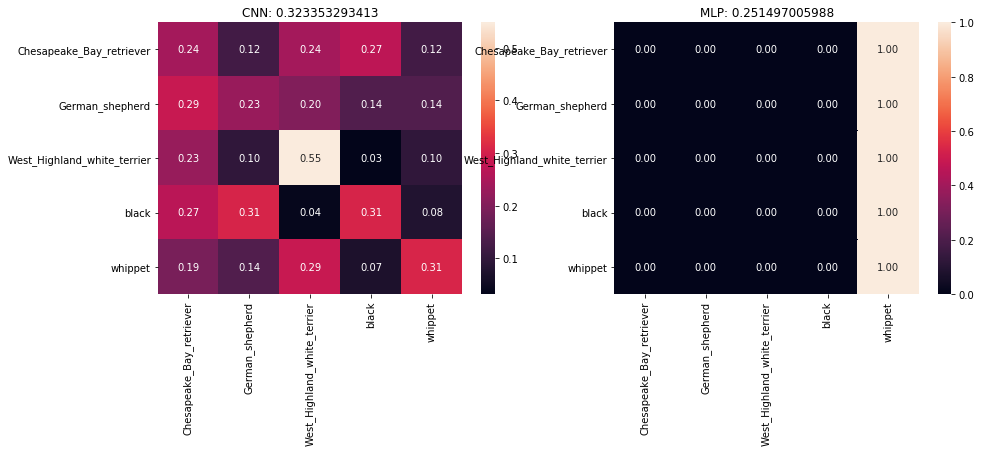

In [59]:
compare_mlp_cnn(cnn,mlp,X_test,y_test)

In [60]:
img_wh = 128
X = np.expand_dims(X.reshape((-1,img_wh,img_wh)), axis=3)

# Split it into train / test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split X_train again to create validation data
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

X_train.shape

(667, 128, 128, 1)

In [61]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None)

datagen.fit(X)

In [62]:
%%time

# now lets use the LeNet architecture with batch norm
from keras.layers.normalization import BatchNormalization

lenet = Sequential()

lenet.add(Conv2D(filters=6,kernel_size=(5,5),
               input_shape = (img_wh,img_wh,1), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda)))
lenet.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
lenet.add(BatchNormalization())
lenet.add(Activation("sigmoid"))

lenet.add(Conv2D(filters=16,kernel_size=(5,5), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda)))
lenet.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
lenet.add(BatchNormalization())
lenet.add(Activation("sigmoid"))
#lenet.add(Dropout(0.5))

lenet.add(Conv2D(filters=120,kernel_size=(1,1), 
               padding='valid', 
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda)))

lenet.add(Flatten())
lenet.add(Dense(84))
lenet.add(Activation("sigmoid"))
lenet.add(Dense(NUM_CLASSES))
lenet.add(Activation('softmax'))

lenet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adadelta', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
lenet.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                      steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
                      epochs=10, verbose=1,
                      validation_data=(X_test,y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
                     )

NameError: name 'l2_lambda' is not defined

In [63]:
def summarize_net(net, X_test, y_test, labels, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'{:.4f}'.format(acc))
    plt.xlabel=labels
    plt.ylabel

In [64]:
summarize_net(lenet, X_test, y_test)

TypeError: summarize_net() missing 1 required positional argument: 'labels'

In [ ]:
set(labels)